In [26]:
import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
state_df = pd.read_csv('usa_state.csv', index_col=0)
state_df

,long,lat,group,order,region,subregion
1,-87.462006,30.389681,1,1,alabama,NaN
2,-87.484932,30.372492,1,2,alabama,NaN
3,-87.525032,30.372492,1,3,alabama,NaN
4,-87.530762,30.332386,1,4,alabama,NaN
5,-87.570869,30.326654,1,5,alabama,NaN
...,...,...,...,...,...,...
15595,-106.856628,41.012318,63,15595,wyoming,NaN
15596,-107.309265,41.018047,63,15596,wyoming,NaN
15597,-107.922333,41.018047,63,15597,wyoming,NaN
15598,-109.056786,40.989399,63,15598,wyoming,NaN


In [3]:
arrest_df = pd.read_csv('usa_arrests.csv', index_col=0)
arrest_df.head()

,Murder,Assault,UrbanPop,Rape,state
Alabama,1.242564,0.782839,-0.520907,-0.003416,alabama
Alaska,0.507862,1.106823,-1.211764,2.484203,alaska
Arizona,0.071633,1.478803,0.998980,1.042878,arizona
Arkansas,0.232349,0.230868,-1.073593,-0.184917,arkansas
California,0.278268,1.262814,1.758923,2.067820,california


In [4]:
merged_df = pd.merge(state_df, arrest_df, left_on='region', right_on='state', how='left')
ordered_df = merged_df.sort_values('order').reset_index(drop=True)
ordered_df.head()

,long,lat,group,order,region,subregion,Murder,Assault,UrbanPop,Rape,state
0,-87.462006,30.389681,1,1,alabama,NaN,1.242564,0.782839,-0.520907,-0.003416,alabama
1,-87.484932,30.372492,1,2,alabama,NaN,1.242564,0.782839,-0.520907,-0.003416,alabama
2,-87.525032,30.372492,1,3,alabama,NaN,1.242564,0.782839,-0.520907,-0.003416,alabama
3,-87.530762,30.332386,1,4,alabama,NaN,1.242564,0.782839,-0.520907,-0.003416,alabama
4,-87.570869,30.326654,1,5,alabama,NaN,1.242564,0.782839,-0.520907,-0.003416,alabama


In [5]:
sdata_df = ordered_df[['long' , 'lat' , 'group' , 'region' , 'Murder' , 'Assault' , 'UrbanPop' , 'Rape']]
sdata_df

,long,lat,group,region,Murder,Assault,UrbanPop,Rape
0,-87.462006,30.389681,1,alabama,1.242564,0.782839,-0.520907,-0.003416
1,-87.484932,30.372492,1,alabama,1.242564,0.782839,-0.520907,-0.003416
2,-87.525032,30.372492,1,alabama,1.242564,0.782839,-0.520907,-0.003416
3,-87.530762,30.332386,1,alabama,1.242564,0.782839,-0.520907,-0.003416
4,-87.570869,30.326654,1,alabama,1.242564,0.782839,-0.520907,-0.003416
...,...,...,...,...,...,...,...,...
15532,-106.856628,41.012318,63,wyoming,-0.226839,-0.117114,-0.382735,-0.601299
15533,-107.309265,41.018047,63,wyoming,-0.226839,-0.117114,-0.382735,-0.601299
15534,-107.922333,41.018047,63,wyoming,-0.226839,-0.117114,-0.382735,-0.601299
15535,-109.056786,40.989399,63,wyoming,-0.226839,-0.117114,-0.382735,-0.601299


In [6]:
molten_data = pd.melt(sdata_df, id_vars=['long' , 'lat' , 'group' , 'region'])
molten_data

,long,lat,group,region,variable,value
0,-87.462006,30.389681,1,alabama,Murder,1.242564
1,-87.484932,30.372492,1,alabama,Murder,1.242564
2,-87.525032,30.372492,1,alabama,Murder,1.242564
3,-87.530762,30.332386,1,alabama,Murder,1.242564
4,-87.570869,30.326654,1,alabama,Murder,1.242564
...,...,...,...,...,...,...
62143,-106.856628,41.012318,63,wyoming,Rape,-0.601299
62144,-107.309265,41.018047,63,wyoming,Rape,-0.601299
62145,-107.922333,41.018047,63,wyoming,Rape,-0.601299
62146,-109.056786,40.989399,63,wyoming,Rape,-0.601299


In [68]:
gdf = geopandas.GeoDataFrame(molten_data, geometry=geopandas.points_from_xy(molten_data.long, molten_data.lat))
gdf.head()

,long,lat,group,region,variable,value,geometry
0,-87.462006,30.389681,1,alabama,Murder,1.242564,POINT (-87.46201 30.38968)
1,-87.484932,30.372492,1,alabama,Murder,1.242564,POINT (-87.48493 30.37249)
2,-87.525032,30.372492,1,alabama,Murder,1.242564,POINT (-87.52503 30.37249)
3,-87.530762,30.332386,1,alabama,Murder,1.242564,POINT (-87.53076 30.33239)
4,-87.570869,30.326654,1,alabama,Murder,1.242564,POINT (-87.57087 30.32665)


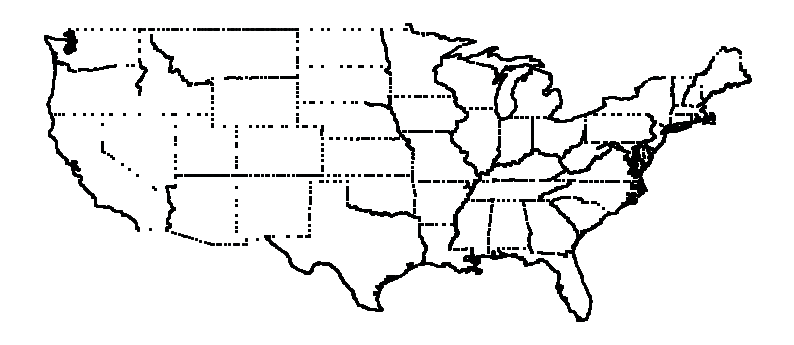

In [84]:
fig,ax = plt.subplots(figsize = (10,10))
# ax=gdf.plot(color='white', edgecolor='black')
gdf.plot(ax = ax, markersize =1,edgecolor='black')#cmap=colors.ListedColormap(['#D94325','#5CD925']))
plt.axis('off')
plt.show()